# Лабораторная работа №7
# Регрессия

Задача регрессии заключается в построении некоторой функции $y\left(x_{1},x_{2},...,x_{d}\right)$, которая наилучшим образом описывает данные из некоторой обучающей выборки $U$, в которой каждому вектору предикторов $x$ ставится в соответствие зависимая переменная $y$. Эта функция ищется в некотором конкретном классе функций.

## Понятие линейной регрессии

Линейная регрессия (linear regression) — это метод восстановления зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, независимых переменных) $\mathbf{x}$ с линейной функцией зависимости от коэффициентов $\mathbf{a}=\left(a_{1},...,a_{m}\right)^{T}$ вида:

$y=f\left(\mathbf{x},\mathbf{a}\right)=\sum_{k=1}^{m}a_{i}f_{i}\left(\mathbf{x}\right),$

где $\mathbf{x}\in\mathbb{R}^{d}$, $\mathbf{a}\in\mathbb{R}^{m}$, $f_{1}\left(\mathbf{x}\right),...,f_{m}\left(\mathbf{x}\right)$ – некоторые функции.

Наиболее популярным вариантом линейной регрессии является предположение $f_{i}\left(\mathbf{x}\right)\equiv x_{i}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

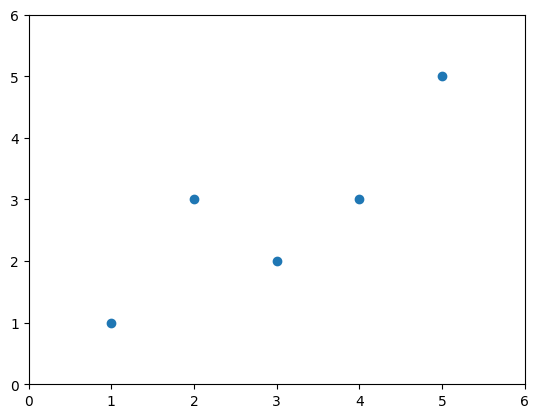

In [4]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean, y_mean

(3.0, 2.8)

Для вычисления коэффициента $a$ прямой $y=a\,x+b$ нужно вычислить  выборочную ковариацию переменных $x$ и $y$ и выборочную дисперсию переменной (признака) $x$.

In [6]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
num, d

(8.0, 10.0)

In [7]:
a = num/d
b = y_mean - a * x_mean
y_hat = a * x + b
a, b

(0.8, 0.39999999999999947)

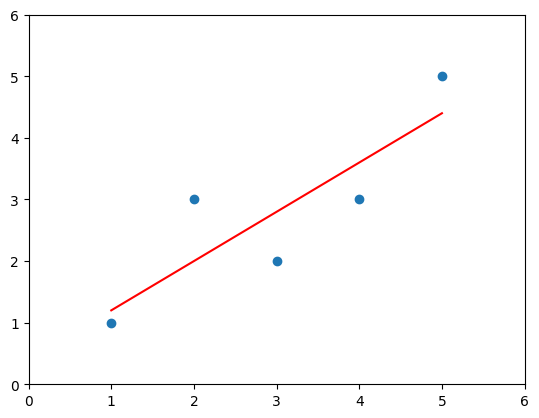

In [8]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

Построенная таким образом функция позволяет прогнозировать значение $y$ по $x$:

In [9]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

Объединим программный код в следующий класс `SimpleLinearRegression1`:

In [10]:
class SimpleLinearRegression1:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = 0.0
        d = 0.0
        for x, y in zip(x_train, y_train):
            num += (x - x_mean) * (y - y_mean)
            d += (x - x_mean) ** 2

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression1()"

Теперь можно создавать объекты этого класса при помощи конструктора и применять к объектам методы класса:

In [11]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [12]:
reg1.a_, reg1.b_

(0.8, 0.39999999999999947)

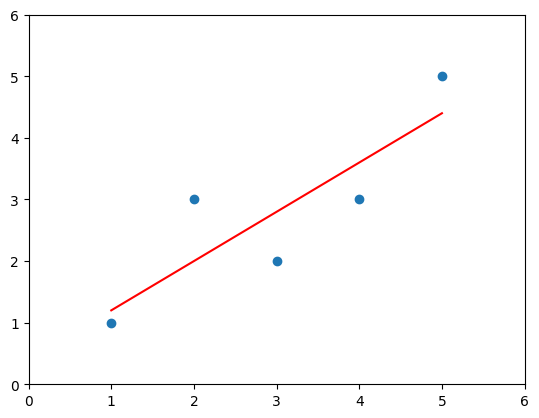

In [13]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

Рассмотрим также альтернативную реализацию регрессии в классе `SimpleLinearRegression2`:

In [14]:
#Improved, the for loop is realized by vectorization to increase efficiency
class SimpleLinearRegression2:
    def __init__(self):
        self.a_=None
        self.b_=None

    def fit(self,x_train,y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        # up = np.dot((x_train-x_mean),(y_train-y_mean))
        # down =np.dot((x_train-x_mean),(x_train-x_mean))
        up = np.sum((x_train - x_mean)*(y_train - y_mean))
        down = np.sum((x_train - x_mean)*(x_train - x_mean))
        self.a_ = up / down
        self.b_ = y_mean - self.a_ * x_mean
        return self

    def _predict(self,x_single):
        return x_single*self.a_+self.b_
    def predict(self,x_predict):
        return np.array([self._predict(x) for x in x_predict])

In [15]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [16]:
reg2.a_, reg2.b_

(0.8, 0.39999999999999947)

In [17]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

2.89 s ± 578 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
56 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
reg1.a_, reg1.b_

(2.001234120605317, 3.0019824260516605)

In [19]:
reg2.a_, reg2.b_

(2.0012341206053614, 3.0019824260516383)

## Метрики регрессии

In [20]:
import warnings
warnings.simplefilter("ignore")

#from sklearn import datasets
#boston = datasets.load_boston()
#boston.keys()

In [21]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

In [22]:
x = boston_data[:,5]
y = boston_target
x.shape, y.shape

((506,), (506,))

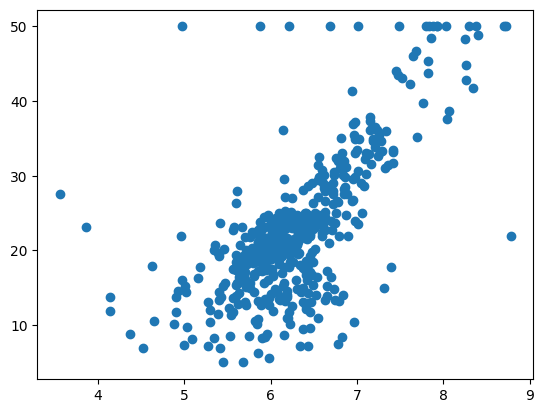

In [23]:
plt.scatter(x, y)
plt.show()

Очистим набор от точек, расположенных вдоль верхней границы графика.

In [24]:
np.max(y)

50.0

In [25]:
x = x[y < 50.0]
y = y[y < 50.0]
x.shape, y.shape

((490,), (490,))

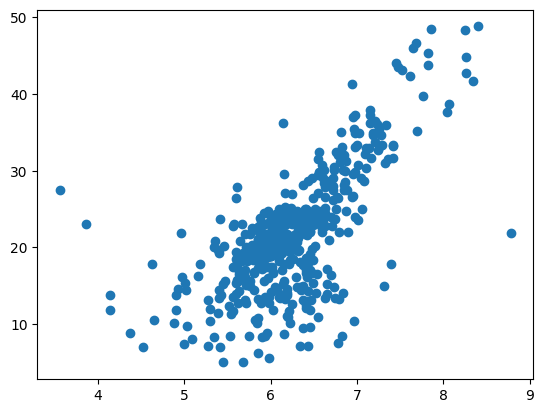

In [26]:
plt.scatter(x, y)
plt.show()

Воспользуемся следующей версией функции `train_test_split`:

In [27]:
def train_test_split(X, y, test_ratio=0.2, seed=None):

    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((392,), (98,), (392,), (98,))

Будем использовать новую версию класса для регрессии:

In [29]:
class SimpleLinearRegression:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression()"

In [30]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [31]:
reg.a_, reg.b_

(7.8608543562689555, -27.459342806705543)

Изобразим на графике точки обучающего набора и линию регрессии:

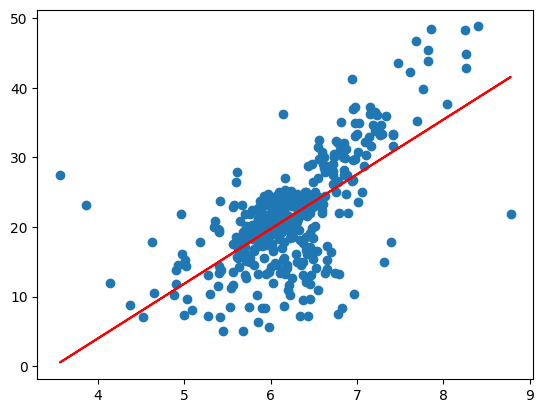

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

А теперь добавим также точки тестового набора другим цветом:

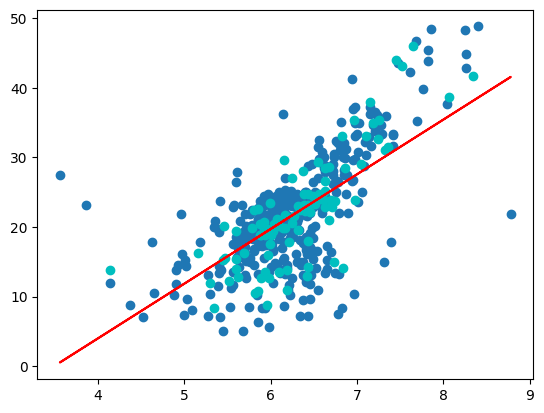

In [33]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [34]:
y_predict = reg.predict(x_test)
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

### Средняя квадратичная ошибка MSE

Средняя квадратичная ошибка (Mean Squared Error, MSE)
применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, у которой меньше больших ошибок прогноза.

$MSE=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$

Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И про модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

In [35]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### Корень из средней квадратичной ошибки RMSE

Корень из средней квадратичной ошибки (Root Mean Squared Error, RMSE)
получается из MSE путем извлечения корня.

$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}$

Каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки.

In [36]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### Cредняя абсолютная ошибка MAE

Cредняя абсолютная ошибка (Mean Absolute Error, MAE) не так сильно  штрафует за большие отклонения по сравнению со среднеквадратичным, и поэтому менее чувствительна к выбросам.

$MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$

In [37]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

Показатели MSE и MAE определены в scikit-learn:

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [39]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [40]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### Коэффициент детерминации $R^2$

Коэффициент детерминации $R^2$ измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной.

$R^{2}=1-\frac{Q}{S_{0}}, Q=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}, S_{0}=\sum_{i=1}^{n}\left(y-\bar{y}\right)^{2}$,

где $\bar{y}$ – это выборочное среднее зависимой переменной $y$. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

In [41]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.6129316803937322

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

### Линейная регрессия в scikit-learn

Для использования линейной регрессии в scikit-learn можно воспользоваться классом `LinearRegression`:

In [43]:
X = boston_data
y = boston_target

X = X[y < 50.0]
y = y[y < 50.0]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, seed=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392,), (98,), (392,), (98,))

In [45]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
X_train.shape, X_test.shape

((392, 1), (98, 1))

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
lin_reg.coef_

array([7.86085436])

In [48]:
lin_reg.intercept_

-27.459342806705543

Метод `score()` возвращает коэффициент детерминации $R^2$:

In [49]:
lin_reg.score(X_test, y_test)

0.6129316803937322

### Подбор параметров регрессии

Для подбора наилучших параметров регрессии можно использовать класс `GridSearchCV` из библиотеки `scikit-learn`. `GridSearchCV` находит наилучшие параметры путем обычного перебора: он создает модель для каждой возможной комбинации параметров, поэтому такой подход может быть весьма затратным по ресурсам.

Рассмотрим в качестве примера регрессор на основе метода ближайших соседей.

In [50]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train, y_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

С параметрами регрессора по умолчанию получаем следующий результат:

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_standard, y_train)
knn_reg.score(X_test_standard, y_test)

0.5862446254022153

Воспользуемся `GridSearchCV`:

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train_standard, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

Параметры лучшего регрессора находятся в свойстве `best_params_`:

In [53]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

Средний показатель качества лучшего регрессора:

In [54]:
grid_search.best_score_

0.4515121790024715

На нашем тестовом наборе лучший регрессор имеет показатель качества:

In [55]:
grid_search.best_estimator_.score(X_test_standard, y_test)

0.6446926776903386

### Полиномиальная регрессия

Полиномиальная регрессия может использоваться для регрессии нелинейных данных. В полиномиальной регрессии проводится кривая линия, соответствующая полиному степени больше 1.

In [56]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
x.shape, X.shape, y.shape

((100,), (100, 1), (100,))

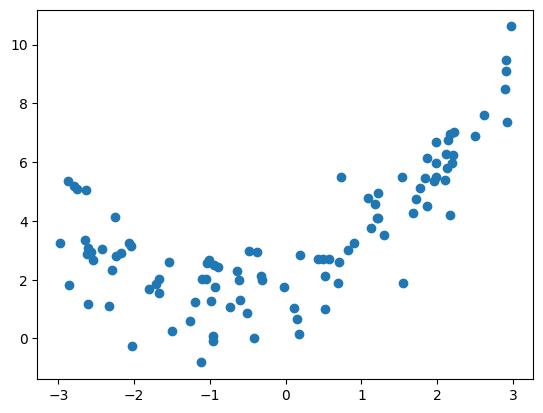

In [57]:
plt.scatter(x, y)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

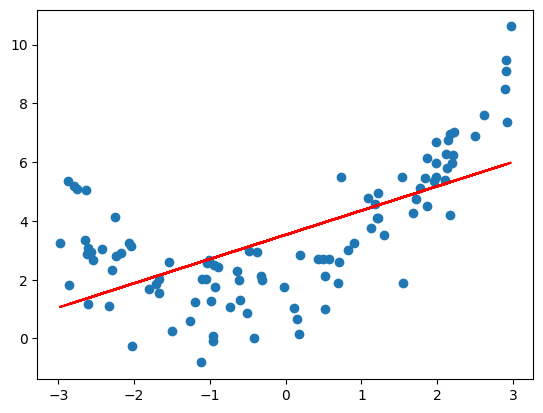

In [59]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [60]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [61]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

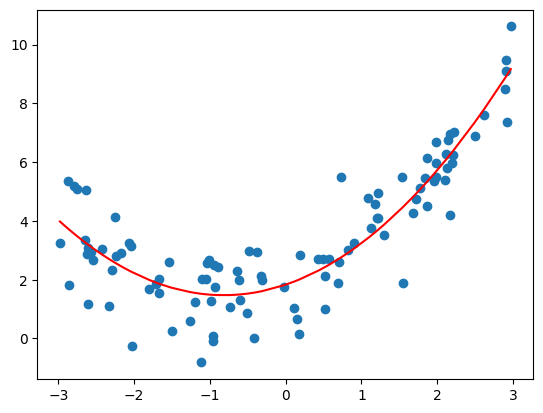

In [62]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [63]:
lin_reg2.coef_

array([0.87556874, 0.53612092])

In [64]:
lin_reg2.intercept_

1.8310573301139463

### Конвейер (Pipeline) в задаче регрессии

In [65]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
x.shape, X.shape, y.shape

((100,), (100, 1), (100,))

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [67]:
X[:5,:]

array([[-1.934075  ],
       [ 0.78877481],
       [-1.11288688],
       [ 2.74286048],
       [ 0.71429385]])

In [68]:
X2[:5,:]

array([[ 1.        , -1.934075  ,  3.7406461 ],
       [ 1.        ,  0.78877481,  0.62216571],
       [ 1.        , -1.11288688,  1.23851721],
       [ 1.        ,  2.74286048,  7.52328363],
       [ 1.        ,  0.71429385,  0.5102157 ]])

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

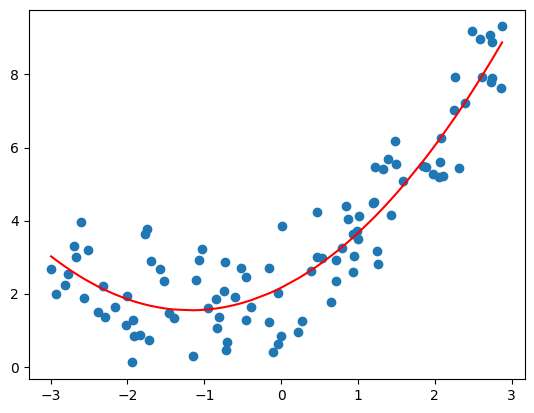

In [70]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [71]:
lin_reg2.coef_

array([0.        , 1.05067262, 0.44669133])

In [72]:
lin_reg2.intercept_

2.1634051718695346

Класс `PolynomialFeatures` позволяет строить наборы данных, содержащий полиномиальные зависимости от исходных данных:

In [73]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [74]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Построение конвейера (Pipeline)

In [76]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [77]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

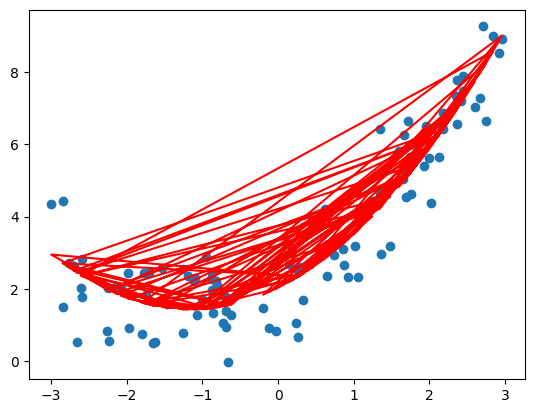

In [78]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

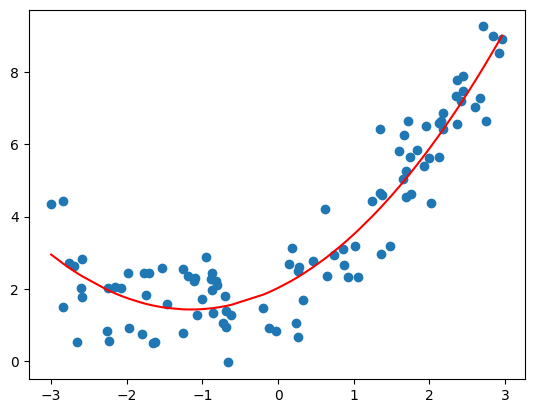

In [79]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

### Переобучение и недообучение

Переобучение (overfitting) — это ситуация, когда алгоритм обучения вырабатывает предсказания, которые слишком близко или точно соответствуют конкретному набору данных и не подходят для применения к другим данным или будущим наблюдениям.

Недообучение (underfitting) — это ситуация, когда алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.

In [ ]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
x.shape, X.shape, y.shape

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

In [ ]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [ ]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

In [ ]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [ ]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [ ]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [ ]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

In [ ]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### Обучающая и тестовые выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [ ]:
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

In [ ]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

In [ ]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

In [ ]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

### Кривые обучения

Кривые обучения — это графическое представление зависимости меры (показателя) качества обучения (по вертикальной оси) от определенного показателя модели обучения (по горизонтальной оси).

In [ ]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape

Будем визуализировать в качестве качества модели показатели `RMSE` для части обучающей выборки и тестовой выборки в зависимости от количества точек в обучающей выборке.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])

    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))

    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

In [ ]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

In [ ]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(X_train)+1)],
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4]) # np.sqrt(test_score).max()
    plt.show()


In [ ]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

In [ ]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

### Регуляризация линейной регрессии

#### Переобучение линейной регрессии

In [ ]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

In [ ]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [ ]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

#### Гребневая регрессия

Гребневая регрессия (ridge regression) – это регрессия, в которой используется функция потерь

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha\sum_{j=1}^{d}\beta_{j}^{2}$

Использование гребневой регрессии позволяет избежать переобучения.

In [ ]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [ ]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(ridge1_reg)

In [ ]:
ridge2_reg = RidgeRegression(20, 1.)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

In [ ]:
plot_model(ridge2_reg)

In [ ]:
ridge3_reg = RidgeRegression(20, 100.)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

In [ ]:
plot_model(ridge3_reg)

In [ ]:
ridge4_reg = RidgeRegression(20, 10000000.)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

In [ ]:
plot_model(ridge4_reg)

#### Регрессия лассо (LASSO)

В регрессии лассо (LASSO, Least Absolute Shrinkage and Selection Operator) используется регуляризация через манхэттенское расстояние:

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha\sum_{j=1}^{d}\left|\beta_{j}\right|$

In [ ]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [ ]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(lasso1_reg)

In [ ]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

In [ ]:
plot_model(lasso2_reg)

In [ ]:
lasso3_reg = LassoRegression(20, 1.)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

In [ ]:
plot_model(lasso3_reg)

#### Регрессия эластичная сеть (elastic net)

В регрессии эластичная сеть (elastic net) используется регуляризация:

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha_{1}\sum_{j=1}^{d}\left|\beta_{j}\right|+\alpha_{2}\sum_{j=1}^{d}\beta_{j}^{2}$

In [ ]:
from sklearn.linear_model import ElasticNet

def ElNetRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("elnet_reg", ElasticNet(alpha=alpha))
    ])

В конструкторе класса `ElasticNet` также имеется параметр `l1_ratio`, по умолчанию равный 0.5. Если `l1_ratio = 0` то штраф как в гребневой регрессии ($L_2$). Если `l1_ratio = 1`, то штраф как в регрессии лассо ($L_1$). Если `0 < l1_ratio < 1`, то штраф представляет собой комбинацию ($L_1$) и ($L_2$).

In [ ]:
elnet1_reg = ElNetRegression(20, 0.01)
elnet1_reg.fit(X_train, y_train)

y1_predict = elnet1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(elnet1_reg)

#### Регрессия при помощи деревьев решений

Деревья решений могут быть использованы не только для решения задачи классификации, но и для решения задачи регрессии.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def TreeRegression(max_leaf_nodes=None):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("tree_reg", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])

In [ ]:
tree1_reg = TreeRegression(10)
tree1_reg.fit(X_train, y_train)

y1_predict = tree1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(tree1_reg)

#### Регрессия при помощи SVM

Для задачи регрессии может также быть использован метод опорных векторов (Support Vector Machines, SVM).

In [ ]:
from sklearn.svm import SVR

def SVMRegression(degree):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svm_reg", SVR(kernel='poly',degree=degree))
    ])

In [ ]:
svm1_reg = SVMRegression(5)
svm1_reg.fit(X_train, y_train)

y1_predict = svm1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(svm1_reg)

### Отбор признаков при помощи линейной регрессии

Линейная регрессия, а также гребневая регрессия и регрессия лассо, могут быть использованы для отбора числовых признаков следующим образом: большую важность (значимость) будут иметь те признаки, для которых коэффициенты регрессии по абсолютной величине принимают большие значения. Признаки с коэффициентами регрессии, близкими к нулю, мало влияют на прогнозируемые значения отклика.

In [ ]:
lasso1_reg

In [ ]:
lasso1_reg[2]

In [ ]:
lasso1_reg[2].coef_

### Выбросы

Выбросами (outliers) называются записи (точки) набора данных с характеристиками, которые существенно отличаются от характеристик остальных записей набора данных.

Чтобы убрать выбросы, можно посчитать стандартизованную оценку (Z-score) для каждого признака и убрать записи, содержащие атрибуты с ненормально высоким или низким Z-score, превышающим по абсолютной величине пороговое значение $\lambda$ (например, $Z>\lambda$ или $Z<-\lambda$).

In [ ]:
X_train_Z = (X_train-X_train.mean())/X_train.std()
X_train_Z.shape

In [ ]:
lam = 2.
X_train_new = X_train_Z[(X_train_Z >= -lam) & (X_train_Z <= lam)].reshape(-1,1)
X_train_new.shape

Точки набора данных могут помечаться как выбросы некоторыми алгоритмами кластеризации.

В алгоритме DBSCAN одиноко расположенные точки помечаются как выбросы (шум).

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.20, min_samples=5)
yhat = model.fit_predict(X_train)
yhat.shape

In [ ]:
print("Метки кластеров:", set(model.labels_))

In [ ]:
print("Доля некластеризованных точек (выбросов):", list(model.labels_).count(-1) / len(list(model.labels_)))

Также точки набора данных помечаются как шум (выбросы) в алгоритме OPTICS.

### Задание на лабораторную работу №7

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.

3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.

4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.

5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.
